# 미니 프로젝트: 택시요금 데이터 다루기 

### - 데이터 불러오기

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('~/data/trip.csv')

### - 데이터 확인

In [62]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [64]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


### - 중복 데이터 확인

In [65]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [66]:
data[data['passenger_name'] == 'Sarah Gross'] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [67]:
data[data['passenger_name'] == 'Lisa Bullock'] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


### - 중복 데이터 제거

In [68]:
data = data.drop_duplicates()

In [69]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


### - 결측치 확인

In [70]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [71]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [72]:
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


### - 결측치 제거

In [73]:
data = data.dropna()

In [74]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

### - passenger_count 컬럼의 이상치 제거

In [75]:
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

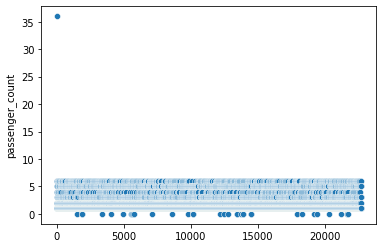

In [76]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [77]:
data = data[data['passenger_count'] <= 6] 

In [78]:
len(data[data['passenger_count'] == 0])

33

In [79]:
data = data[data['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

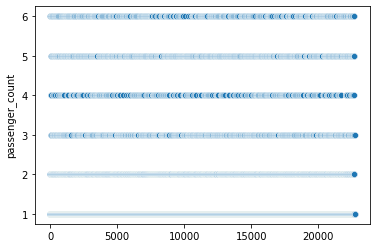

In [80]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

### - 수치형 컬럼의 이상치 제거

  * trip_distance 이상치 제거

In [81]:
data['trip_distance'].sort_values()

3764      0.00
13064     0.00
5620      0.00
1277      0.00
5632      0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22662, dtype: float64

<AxesSubplot:ylabel='trip_distance'>

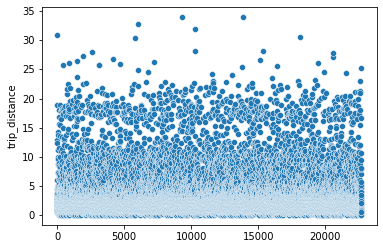

In [82]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

In [83]:
data = data[data['trip_distance'] != 0]

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

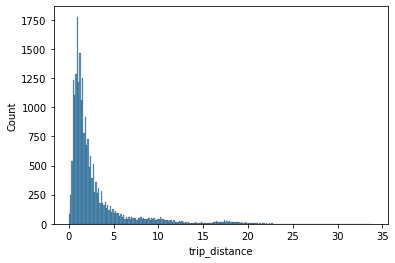

In [84]:
sns.histplot(data['trip_distance'])

  * fare_amount 이상치 제거

In [85]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22515.000000,22515.000000,22515.000000,22515.000000,22515.000000
mean,1.645969,2.931924,12.958055,1.829513,0.309625
std,1.285783,3.657290,12.701799,2.767054,1.387300
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


In [86]:
data[data['fare_amount'] <= 0].count()

passenger_name           16
tpep_pickup_datetime     16
tpep_dropoff_datetime    16
payment_method           16
passenger_count          16
trip_distance            16
fare_amount              16
tip_amount               16
tolls_amount             16
dtype: int64

In [87]:
# 0보다 큰 데이터만 남기기

data = data[data['fare_amount'] > 0]

In [88]:
data[data['fare_amount'] <= 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [89]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
14470,Leah Carrillo,09/09/2017 1:29:37 PM,09/09/2017 1:29:57 PM,Credit Card,3,0.02,2.50,0.00,0.00
2987,Christine Harper,11/24/2017 4:32:18 AM,11/24/2017 4:32:23 AM,Credit Card,1,0.01,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
6702,Yvonne Brooks,08/26/2017 7:33:22 AM,08/26/2017 7:34:18 AM,Debit Card,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


<AxesSubplot:ylabel='fare_amount'>

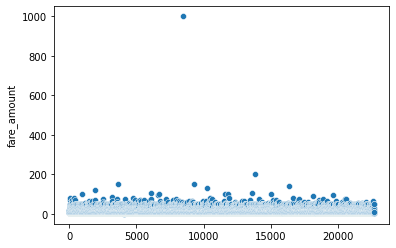

In [90]:
sns.scatterplot(x= data.index, y = data['fare_amount'])

In [91]:
# 150 넘는 fare_amount 를 150으로 변환하기

data['fare_amount'].apply(lambda x : 150 if x > 150 else x)

# 또는 def 이용
# def fare_func(x):
#     if x > 150:
#         return 150
#     else:
#         return x

# data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22499, dtype: float64

In [92]:
# 변환하여 데이터 저장

data['fare_amount'] = data['fare_amount'].apply(lambda x : 150 if x > 150 else x)

In [93]:
data['fare_amount'].sort_values()

4063       0.01
14470      2.50
2987       2.50
16351      2.50
6702       2.50
          ...  
16381    140.00
13863    150.00
9282     150.00
3584     150.00
8478     150.00
Name: fare_amount, Length: 22499, dtype: float64

In [111]:
data['fare_ratio'] = data['fare_amount'] / data['trip_distance']

In [115]:
data.tail(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pyment_method,fare_ratio
22670,Shirley Ferguson,02/22/2017 6:45:04 AM,02/22/2017 7:19:34 AM,Card,5,25.30,67.5,17.08,0.00,Card,2.667984
22671,Patrick Conrad,05/18/2017 10:52:43 PM,05/18/2017 11:03:01 PM,Cash,3,0.83,7.5,1.76,0.00,Cash,9.036145
22673,Patricia Todd,05/26/2017 8:33:20 AM,05/26/2017 8:55:11 AM,Card,1,5.10,19.5,3.00,0.00,Card,3.823529
22674,Steven Kelley,02/03/2017 8:47:51 AM,02/03/2017 8:59:05 AM,Card,1,1.40,9.0,2.90,0.00,Card,6.428571
22675,Robert Manning,07/09/2017 5:25:16 PM,07/09/2017 5:29:16 PM,Cash,1,0.80,5.0,0.00,0.00,Cash,6.250000
22676,Andrew Jones,01/03/2017 9:09:58 AM,01/03/2017 9:14:17 AM,Cash,1,0.60,5.0,1.15,0.00,Cash,8.333333
22677,Nicole Wyatt,07/09/2017 9:09:10 AM,07/09/2017 9:15:31 AM,Card,1,1.70,7.5,0.00,0.00,Card,4.411765
22678,Ricardo Peterson,12/14/2017 12:21:01 PM,12/14/2017 12:56:21 PM,Cash,1,9.47,32.0,6.00,5.76,Cash,3.379092
22679,Ms. Cindy Golden,06/19/2017 8:31:08 PM,06/19/2017 8:34:50 PM,Cash,1,0.80,5.0,0.50,0.00,Cash,6.250000
22680,Willie Davis,01/11/2017 7:31:30 PM,01/11/2017 7:39:52 PM,Card,1,2.09,8.5,2.58,0.00,Card,4.066986


In [116]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,fare_ratio
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,1.645940,2.932624,12.934335,1.820616,0.309289,7.407087
std,1.285628,3.656023,10.829829,2.396670,1.385389,72.079264
min,1.000000,0.010000,0.010000,0.000000,0.000000,0.002222
25%,1.000000,1.000000,6.500000,0.000000,0.000000,4.325260
50%,1.000000,1.630000,9.500000,1.360000,0.000000,5.508475
75%,2.000000,3.090000,14.500000,2.450000,0.000000,7.068063
max,6.000000,33.960000,150.000000,30.000000,19.100000,5200.000000


In [118]:
data['fare_ratio'].sort_values().tail(30)

13519     112.500000
14415     118.181818
14189     118.181818
15348     125.000000
16829     125.000000
13496     125.000000
20135     125.000000
14470     125.000000
325       125.000000
19371     125.000000
16351     125.000000
162       226.086957
2476      247.619048
5503      250.000000
9190      250.000000
2987      250.000000
13436     260.000000
7169      260.000000
11384     260.000000
8041      260.000000
6710      312.500000
3290      520.000000
5202      520.000000
4543      525.000000
21090     683.333333
5431     2600.000000
19646    5200.000000
8199     5200.000000
3611     5200.000000
19829    5200.000000
Name: fare_ratio, dtype: float64

In [119]:
data = data[data['fare_ratio'] < 1000]

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22494 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22494 non-null  object 
 1   tpep_pickup_datetime   22494 non-null  object 
 2   tpep_dropoff_datetime  22494 non-null  object 
 3   payment_method         22494 non-null  object 
 4   passenger_count        22494 non-null  int64  
 5   trip_distance          22494 non-null  float64
 6   fare_amount            22494 non-null  float64
 7   tip_amount             22494 non-null  float64
 8   tolls_amount           22494 non-null  float64
 9   pyment_method          22494 non-null  object 
 10  fare_ratio             22494 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 2.1+ MB


<AxesSubplot:ylabel='fare_amount'>

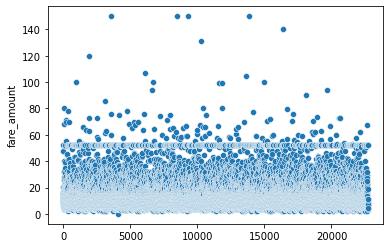

In [121]:
sns.scatterplot(x= data.index, y = data['fare_amount'])

  * tip_amount 이상치 제거

<AxesSubplot:ylabel='tip_amount'>

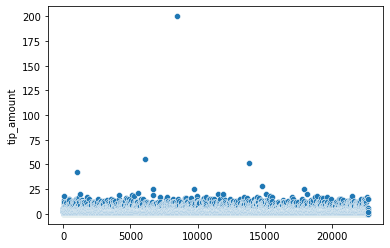

In [94]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

In [95]:
data['tip_amount'].sort_values()

11357      0.00
19486      0.00
19485      0.00
9190       0.00
19482      0.00
          ...  
14827     28.00
986       42.29
13863     51.64
6066      55.50
8478     200.00
Name: tip_amount, Length: 22499, dtype: float64

In [96]:
data['tip_amount'] = data['tip_amount'].apply(lambda x : 30 if x > 30 else x)

In [97]:
data['tip_amount'].sort_values()

11357     0.0
19486     0.0
19485     0.0
9190      0.0
19482     0.0
         ... 
14827    28.0
986      30.0
8478     30.0
13863    30.0
6066     30.0
Name: tip_amount, Length: 22499, dtype: float64

<AxesSubplot:ylabel='tip_amount'>

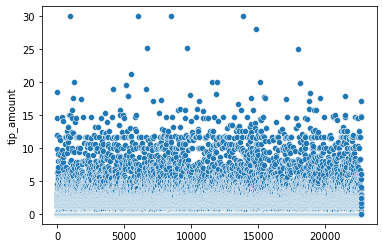

In [98]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

  * tolls_amount 이상치 제거

<AxesSubplot:ylabel='tolls_amount'>

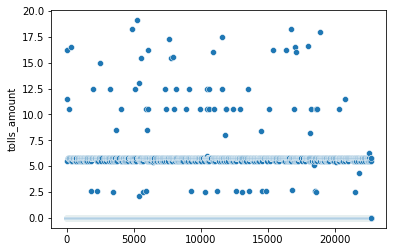

In [99]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

In [101]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,1.645940,2.932624,12.934335,1.820616,0.309289
std,1.285628,3.656023,10.829829,2.396670,1.385389
min,1.000000,0.010000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,150.000000,30.000000,19.100000


### - 범주형 데이터 전처리

  * 결제 방법: Debit Card와 Credit Card를 Card로 통합

In [102]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [103]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [104]:
data['payment_method'].nunique()

3

In [105]:
data['payment_method'].value_counts()

Cash           11095
Debit Card      5730
Credit Card     5674
Name: payment_method, dtype: int64

In [109]:
data['payment_method'] = data['payment_method'].replace({'Debit Card' : 'Card', 'Credit Card' : 'Card'})

In [122]:
data['payment_method'].value_counts()

Card    11403
Cash    11091
Name: payment_method, dtype: int64

  * 승객명 성과 이름 분리

In [123]:
example = 'Susan Robinson'

In [124]:
example.split()

['Susan', 'Robinson']

In [125]:
data['passeneger_first_name'] = data['passenger_name'].str.split().apply(lambda x : x[0])

/tmp/ipykernel_55/2601608939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['passeneger_first_name'] = data['passenger_name'].str.split().apply(lambda x : x[0])


In [126]:
data.head(10)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pyment_method,fare_ratio,passeneger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Card,3.892216,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Card,8.888889,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Card,6.500000,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Cash,5.540541,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Card,3.775744,Brianna
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Card,6,2.30,9.0,2.06,0.0,Card,3.913043,Justin
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.5,9.86,0.0,Cash,3.702260,Tonya
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Card,1,2.98,16.0,1.78,0.0,Card,5.369128,Hannah
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.0,0.00,0.0,Cash,7.500000,Katie
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.0,2.75,0.0,Cash,8.125000,Amanda


  * 택시 탑승, 하차 시간 활용

In [127]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pyment_method,fare_ratio,passeneger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Card,3.892216,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Card,8.888889,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Card,6.500000,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Cash,5.540541,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Card,3.775744,Brianna


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22494 entries, 0 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22494 non-null  object 
 1   tpep_pickup_datetime   22494 non-null  object 
 2   tpep_dropoff_datetime  22494 non-null  object 
 3   payment_method         22494 non-null  object 
 4   passenger_count        22494 non-null  int64  
 5   trip_distance          22494 non-null  float64
 6   fare_amount            22494 non-null  float64
 7   tip_amount             22494 non-null  float64
 8   tolls_amount           22494 non-null  float64
 9   pyment_method          22494 non-null  object 
 10  fare_ratio             22494 non-null  float64
 11  passeneger_first_name  22494 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 2.2+ MB


In [130]:
from datetime import datetime

In [131]:
# 픽업시간을 datetime으로 변환

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

/tmp/ipykernel_55/1181564162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])


In [133]:
# 드롭오프 시간을 datetime으로 변환

data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

/tmp/ipykernel_55/828270954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22494 entries, 0 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22494 non-null  object        
 1   tpep_pickup_datetime   22494 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22494 non-null  datetime64[ns]
 3   payment_method         22494 non-null  object        
 4   passenger_count        22494 non-null  int64         
 5   trip_distance          22494 non-null  float64       
 6   fare_amount            22494 non-null  float64       
 7   tip_amount             22494 non-null  float64       
 8   tolls_amount           22494 non-null  float64       
 9   pyment_method          22494 non-null  object        
 10  fare_ratio             22494 non-null  float64       
 11  passeneger_first_name  22494 non-null  object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory

In [135]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

/tmp/ipykernel_55/526381100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']


In [136]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pyment_method,fare_ratio,passeneger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Card,3.892216,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Card,8.888889,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Card,6.500000,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Cash,5.540541,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Card,3.775744,Brianna,0 days 00:16:43


In [139]:
data['travel_time'] = data['travel_time'].dt.seconds

/tmp/ipykernel_55/3822440553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['travel_time'] = data['travel_time'].dt.seconds


In [140]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pyment_method,fare_ratio,passeneger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Card,3.892216,Pamela,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Card,8.888889,Michelle,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Card,6.500000,Tina,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Cash,5.540541,Anthony,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Card,3.775744,Brianna,1003


In [141]:
data.drop('pyment_method', axis = 1, inplace = True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [142]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,fare_ratio,passeneger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,3.892216,Pamela,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,8.888889,Michelle,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,6.500000,Tina,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,5.540541,Anthony,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,3.775744,Brianna,1003


  * 보너스 (feature engineering 맛보기)

In [143]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장

data['total_amount'] = data['fare_amount'] + data['tip_amount']

/tmp/ipykernel_55/2450203444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_amount'] = data['fare_amount'] + data['tip_amount']


<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

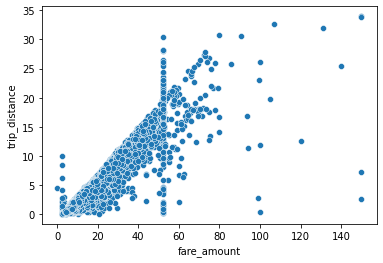

In [146]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현

sns.scatterplot(x = data['fare_amount'], y = data['trip_distance'])

<AxesSubplot:xlabel='fare_amount', ylabel='travel_time'>

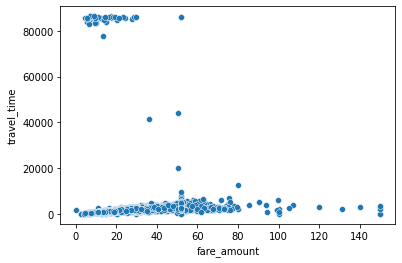

In [149]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현

sns.scatterplot(x = data['fare_amount'], y = data['travel_time'])

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

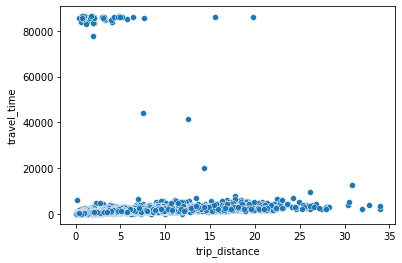

In [150]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현

sns.scatterplot(x = data['trip_distance'], y = data['travel_time'])

In [157]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거

data = data[data['travel_time'] < 10000]

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

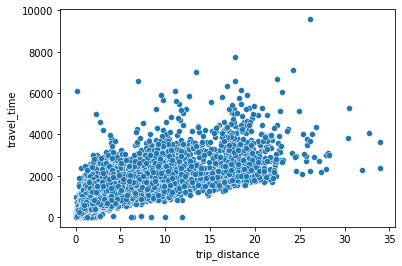

In [158]:
sns.scatterplot(x = data['trip_distance'], y = data['travel_time'])

In [161]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,fare_ratio,travel_time,total_amount
count,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000,22448.000000
mean,1.645358,2.930149,12.913739,1.819535,0.307959,6.369446,865.015681,14.733274
std,1.284769,3.650192,10.800134,2.389958,1.382079,10.096859,694.544803,12.384633
min,1.000000,0.010000,0.010000,0.000000,0.000000,0.002222,1.000000,0.010000
25%,1.000000,1.000000,6.500000,0.000000,0.000000,4.325782,403.000000,7.500000
50%,1.000000,1.630000,9.500000,1.360000,0.000000,5.506608,674.000000,10.950000
75%,2.000000,3.090000,14.500000,2.450000,0.000000,7.065217,1103.000000,16.500000
max,6.000000,33.960000,150.000000,30.000000,19.100000,683.333333,9559.000000,180.000000


In [162]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,fare_ratio,passeneger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,3.892216,Pamela,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,8.888889,Michelle,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,6.500000,Tina,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,5.540541,Anthony,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,3.775744,Brianna,1003,16.50


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22448 entries, 0 to 22700
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22448 non-null  object        
 1   tpep_pickup_datetime   22448 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22448 non-null  datetime64[ns]
 3   payment_method         22448 non-null  object        
 4   passenger_count        22448 non-null  int64         
 5   trip_distance          22448 non-null  float64       
 6   fare_amount            22448 non-null  float64       
 7   tip_amount             22448 non-null  float64       
 8   tolls_amount           22448 non-null  float64       
 9   fare_ratio             22448 non-null  float64       
 10  passeneger_first_name  22448 non-null  object        
 11  travel_time            22448 non-null  int64         
 12  total_amount           22448 non-null  float64       
dtypes